In [6]:
import matplotlib.pyplot as plt
import numpy as np

plt.rc('figure', figsize=[13,7]) #Diagramm size
plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=15)     # fontsize of the axes title
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize
plt.rc('figure', titlesize=12)  # fontsize of the figure title

h_bar = 1.0545718*10**-34 #hbar
m_e   = 9.10938356*10**-31 #Electron mass m_e

def I(start,end,steps,edge_points=True): #Intervall
    if edge_points==True:
        return [start+i*(end-start)/(steps-1) for i in range(steps)]
    else:
        return [start+(i+1)*(end-start)/(steps+1) for i in range(steps)]
    
def sort_eigenValues(A,absolute=False): #Sorting eigenvalues
    eigenValues, eigenVectors = np.linalg.eigh(A)
    if absolute==True:
        idx = np.argsort(abs(eigenValues))
    if absolute==False:
        idx = np.argsort(eigenValues)
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    return [eigenValues,eigenVectors]

def V(x,v): #Quantum well potential
    if abs(x)>1:
        return v
    else:
        return 0
    
def H(start_x,end_x,steps_x,v,m=0.012*m_e): #Quantum well Hamiltonian in finite difference approximation
    X = np.zeros((steps_x,steps_x))
    Y = I(start_x,end_x,steps_x,edge_points=False)
    d=(end_x-start_x)/(steps_x+1)
    for z in range(steps_x):
        X[z,z] = (h_bar**2)/m/((d)**2)+V(Y[z],v)
        if z<steps_x-1:
            X[z,z+1]=-(h_bar**2)/m/((d)**2)/2
            X[z+1,z]=-(h_bar**2)/m/((d)**2)/2
    return X 

def E(n,m=0.012*m_e):#Analytic E
    return [h_bar**2*np.pi**2/8*(i+1)**2/m for i in range(n)]

def Psi(x,n,m=0.012*m_e): #Analytic eigenfunction (not normalized)
    k = n*np.pi/2
    return np.sin(k*(x+1))

def Plot_quantum_well(start_x,end_x,steps_x,v,number_plot_eigenfunction=3):#Plots for quantum well
    X = I(start_x,end_x,steps_x,edge_points=False)
    M =sort_eigenValues(H(start_x,end_x,steps_x,v),absolute=False)
    l=0
    while M[0][l]<v:
        l +=1
    l +=-1
    Y=np.array(E(l))
    plt.plot([i+1 for i in range(l)],[M[0][i]*10**32 for i in range(l)],c='r')
    plt.plot([i+1 for i in range(l)],Y*10**32,c='b')
    plt.xlabel('n')
    plt.ylabel('E [$10^{-32}$ J]')
    plt.legend(["Numeric $E_n$","Analytic $E_n$"],loc="upper left")
    plt.title("Numeric $E_n$ vs. Analytic $E_n$")
    plt.show()
    plt.plot([i+1 for i in range(l)],[abs(M[0][i]-Y[i])/Y[i]*100 for i in range(l)],c='k')
    plt.title("Relative error")
    plt.xlabel('n')
    plt.ylabel('%')
    plt.show()
    for i in range(min(number_plot_eigenfunction,l)):
        plt.plot(X,M[1][:,i]**2*max(Psi(np.linspace(-1,1,1000),i+1)**2)/max(M[1][:,i])**2,'r')
        plt.plot(np.linspace(-1,1,1000),Psi(np.linspace(-1,1,1000),i+1)**2,'--b',alpha=0.5)
        plt.xlim(-1.1,1.1)
        plt.xlabel('x')
        plt.ylabel('$|\Psi|^2$')
        plt.title("Eigenfunction for $E_{%d}$" %(i+1))
        plt.yticks([0])
        plt.legend(["Numeric $|\Psi|^2$","Analytic $|\Psi|^2$"],loc="upper left")
        plt.show()

# Infinite potential well with finite difference method

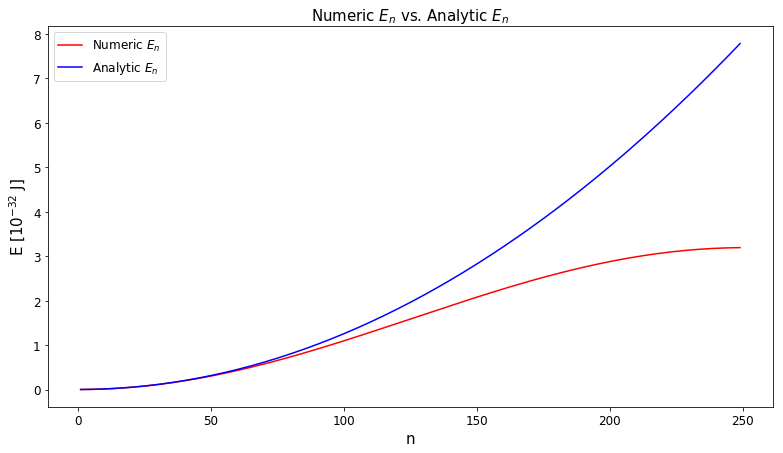

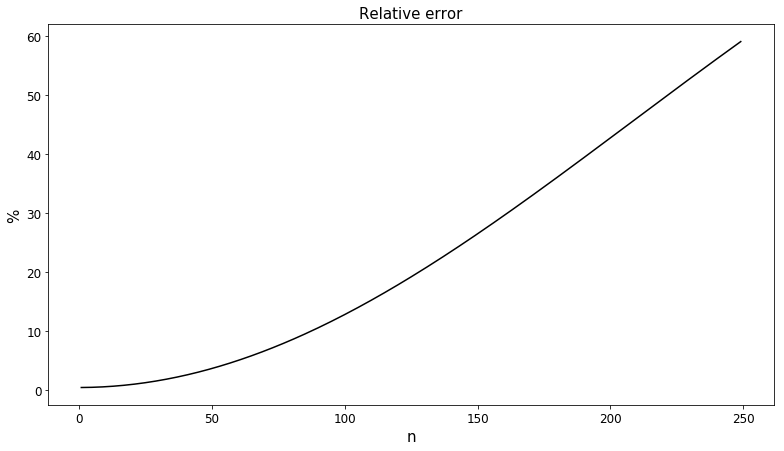

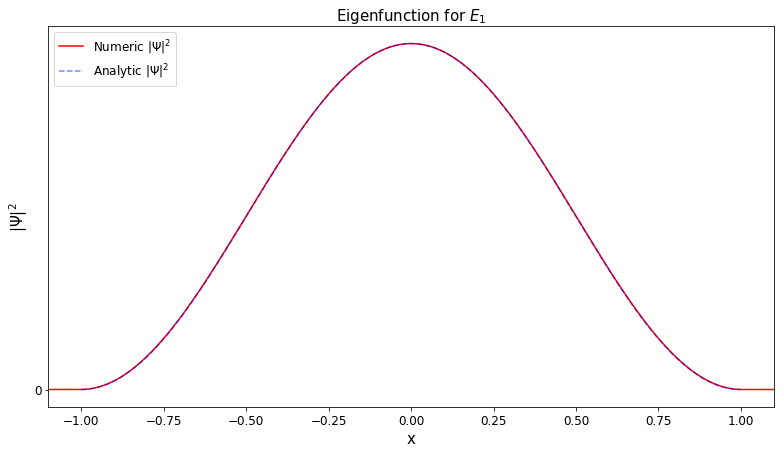

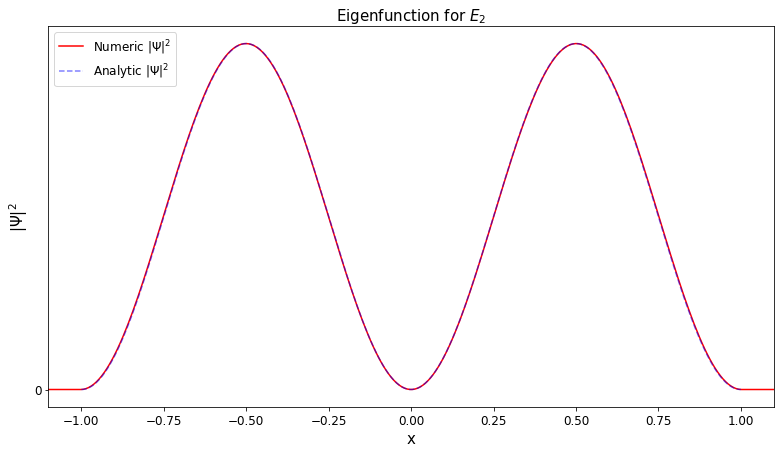

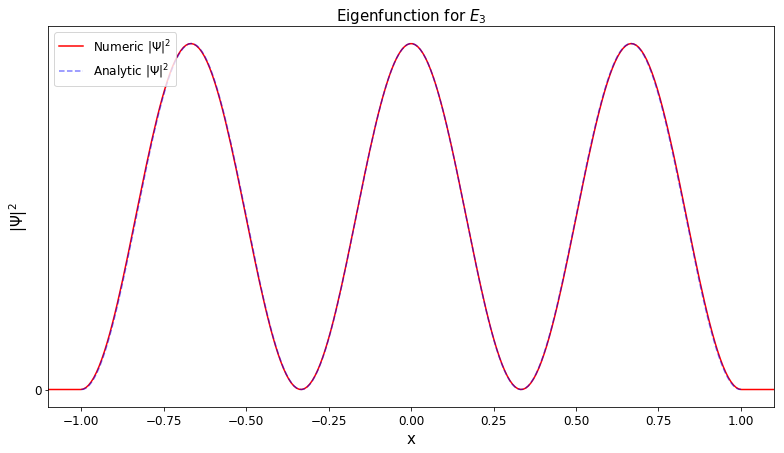

In [7]:
Plot_quantum_well(start_x=-2,end_x=2,steps_x=500,v=10**10)